In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv("klasifikasi_cuaca.csv")

In [3]:
print("\n--- Dataset Info ---")
print(data.info())
print("\n--- Descriptive Statistics ---")
print(data.describe())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Suhu (°C)                 16 non-null     int64 
 1   Kelembapan (%)            16 non-null     int64 
 2   Kecepatan Angin (km/jam)  16 non-null     int64 
 3   Jenis Cuaca               16 non-null     object
dtypes: int64(3), object(1)
memory usage: 644.0+ bytes
None

--- Descriptive Statistics ---
       Suhu (°C)  Kelembapan (%)  Kecepatan Angin (km/jam)
count  16.000000       16.000000                 16.000000
mean   25.375000       80.500000                 10.187500
std     5.875089       12.247449                  5.741298
min    17.000000       60.000000                  2.000000
25%    20.750000       69.500000                  5.750000
50%    24.500000       83.500000                  9.500000
75%    30.250000       90.500000               

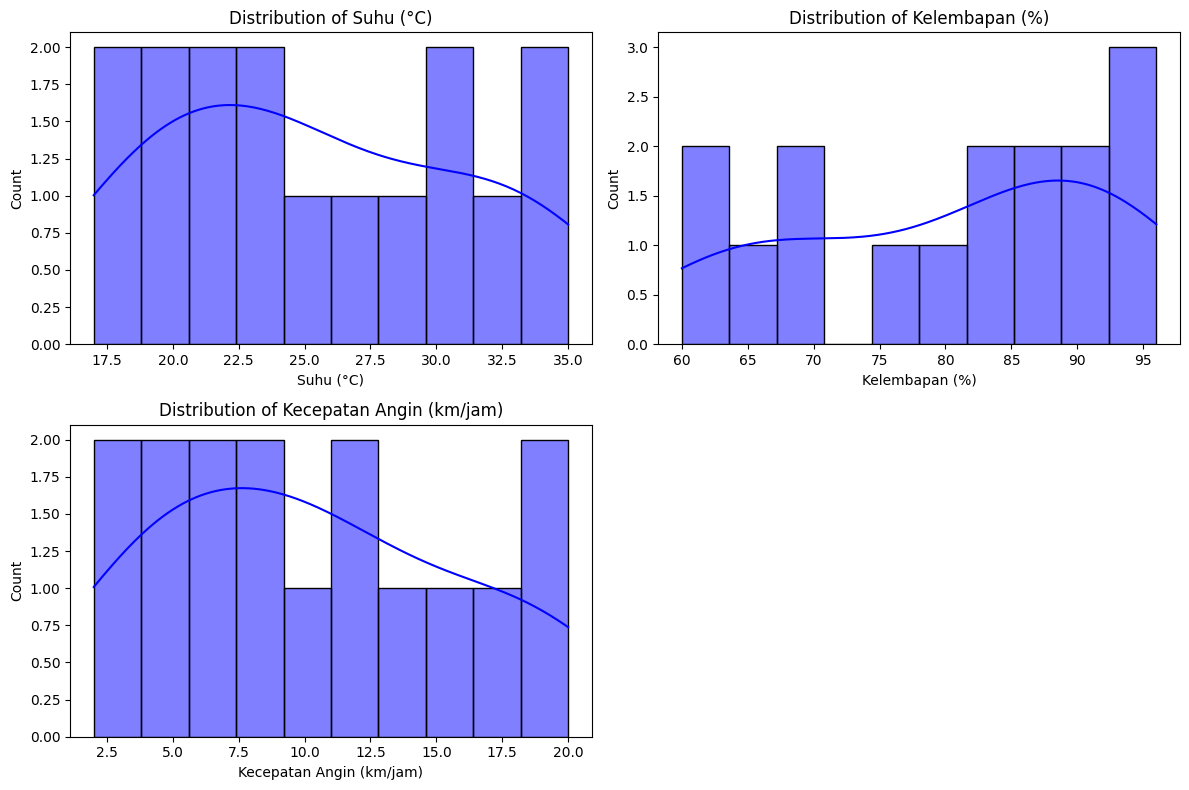

In [4]:
numerical_features = ['Suhu (°C)', 'Kelembapan (%)', 'Kecepatan Angin (km/jam)']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=10, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

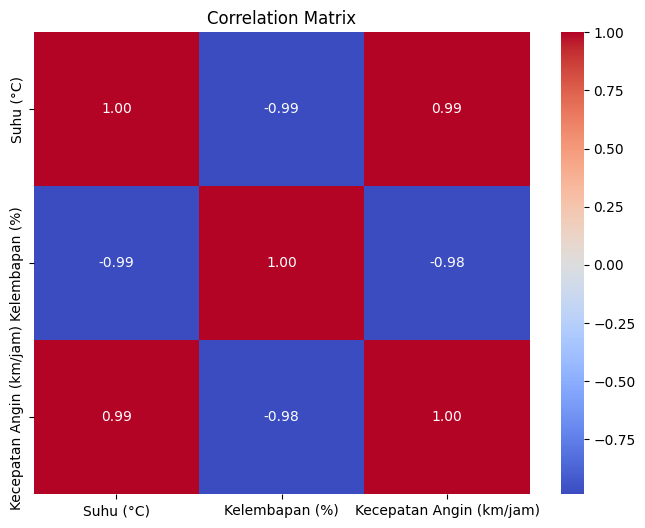

In [5]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [6]:
print("\n--- Missing Values ---")
print(data.isnull().sum())


--- Missing Values ---
Suhu (°C)                   0
Kelembapan (%)              0
Kecepatan Angin (km/jam)    0
Jenis Cuaca                 0
dtype: int64


In [7]:
label_encoder = LabelEncoder()
data['Jenis Cuaca Encoded'] = label_encoder.fit_transform(data['Jenis Cuaca'])

In [8]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [9]:
X = data[numerical_features]
y = data['Jenis Cuaca Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


--- Classification Report ---
              precision    recall  f1-score   support

     Berawan       1.00      1.00      1.00         2
       Cerah       1.00      1.00      1.00         1
       Hujan       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


--- Confusion Matrix ---


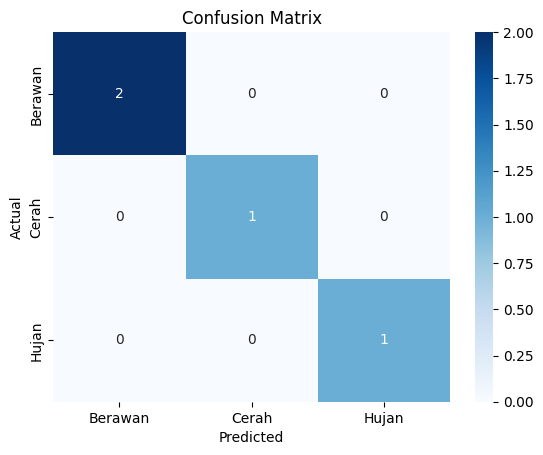

In [11]:
predictions = model.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(y_test, predictions, target_names=label_encoder.classes_))

print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
import pickle
filename = "klasifikasi_cuaca.csv"
pickle.dump(RandomForestClassifier, open(filename,"wb"))